In [1]:
from em_functions import *


In [16]:
plt.gcf().subplots_adjust(bottom=0.15)

<Figure size 432x288 with 0 Axes>

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('./weeplace_checkins.csv').dropna()
cities = (df['city'].value_counts()[:5]).index
col = ['userid', 'datetime','city','category']
df = df[df['city'].isin(cities)][col]

In [4]:
city = 'London'
ld = EMClass(df, city, 4)

In [5]:
eps=0.001 # критерий остановки
min_seq_len=5 # минимальная длина последовательности активности за неделю, для обучения.
q=0.5 # квантиль количества последовательностей, определяет, какое количество последовательностей от уникальных пользователей будет использоваться

seqs, seqs_full, params, predictions_for_city = ld.main(eps=eps, min_seq_len=min_seq_len, q=q, full=False, save=False)

Fri Feb  5 02:01:46 2021
London
Fri Feb  5 02:02:08 2021
London generation of sequences - Done
Total count of sequences for min_len = 5: 2793
Quantile 0.5 (count of seqs of unique persons): 7.0
i = 5, L = 0.3114147740224831
i = 10, L = 0.10925845987361363
i = 15, L = 0.040848578355124655
i = 20, L = 0.04322279318467831
i = 25, L = 0.0327753138878597
i = 30, L = 0.050962230105204794
i = 35, L = 0.03277000945964506
i = 40, L = 0.009099533673758105
i = 45, L = 0.006465098371414319
i = 50, L = 0.0028954857984469663
i = 55, L = 0.001800656263212611
i = 60, L = 0.0012419363183390235
i = 65, L = 0.0010296301726931557
i = 70, L = 0.001079726323263083
i = 75, L = 0.001341086436483612
i = 80, L = 0.0018378164209431572
i = 85, L = 0.002688859300902853
i = 90, L = 0.004124095025567508
i = 95, L = 0.006920024522345299
i = 100, L = 0.012587027645479459
i = 105, L = 0.01022976234683073
i = 110, L = 0.009062372838645931
i = 115, L = 0.009929292880855405
i = 120, L = 0.011570100596258345
i = 125, L = 0

pi =  [0.2694 0.2716 0.3501 0.109 ]


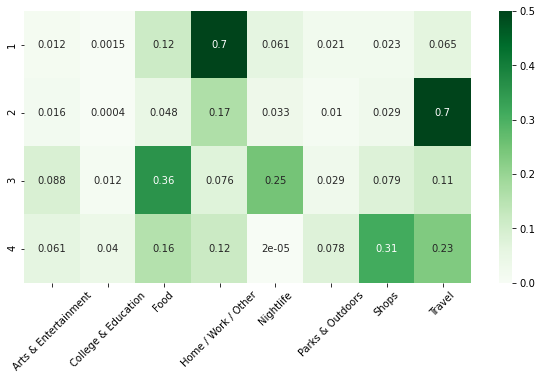

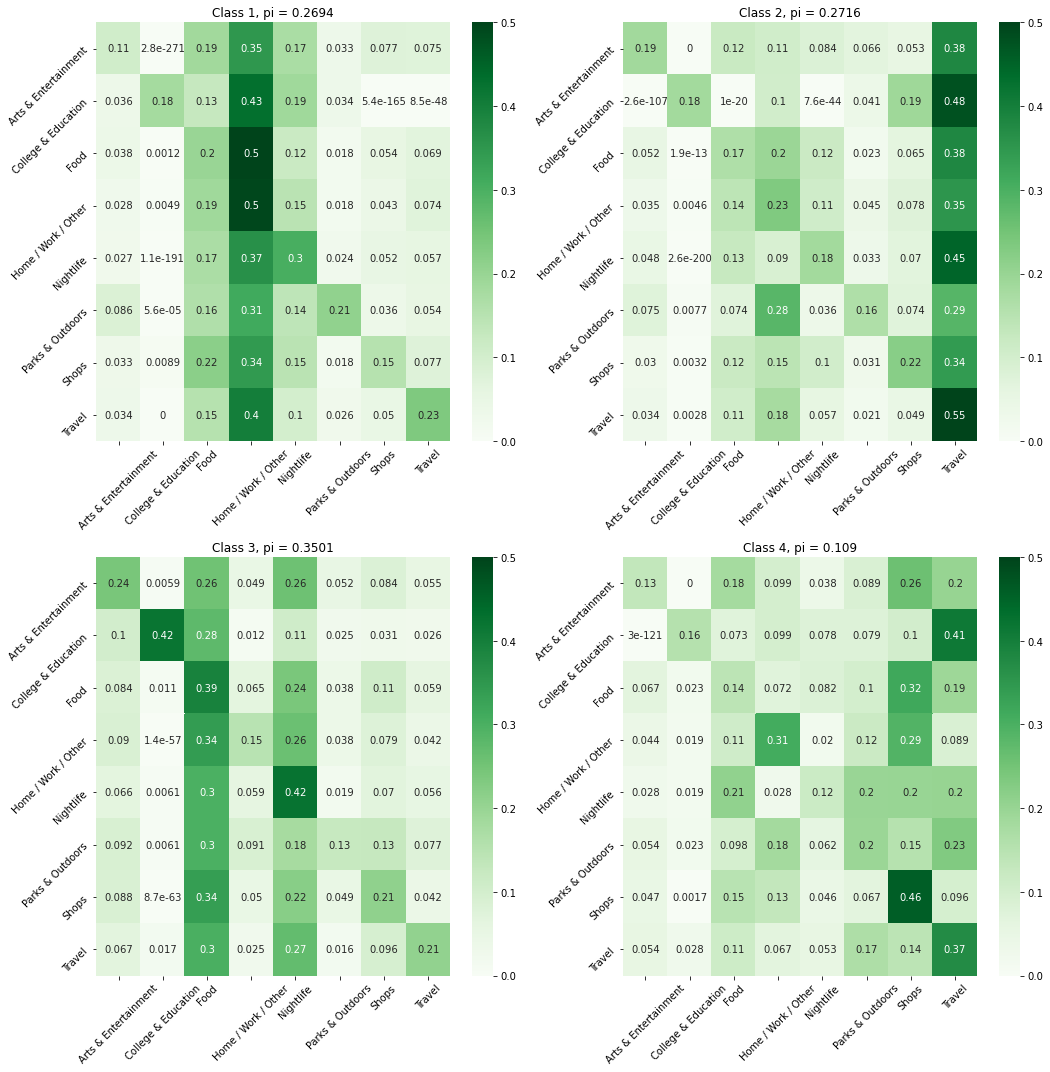

In [6]:
ld.plot_heatmaps(fig_name=city)
# plot_heatmaps(ld.pi, ld.f, ld.T, ld.le)

In [21]:
def plot_heatmaps(pi, f, T, le, fig_name=None):
    C=len(pi)
    
    print('pi = ', np.round(pi, 4))
    plt.figure(figsize=(10,5))
    plt.gcf().subplots_adjust(bottom=0.35)
    hm = sns.heatmap(data=f, annot=True, vmin=0, vmax=0.5, cmap = 'Greens')
    hm.set_xticklabels(le.classes_, rotation=45)
    hm.set_yticklabels(range(1, C+1))
    if fig_name:
        plt.savefig(fig_name+'_f.png')
        
    plt.show()
    
    plt.figure(figsize=(15,15))
    plt.gcf().subplots_adjust(bottom=0.15)
    for i in range(C):
        plt.subplot(100*math.ceil(C/2) + 21+i)
        plt.title(f"Class {i+1}, pi = {np.round(pi[i], 4)}")
        hm = sns.heatmap(data=T[i], annot=True, vmin=0, vmax=0.5, cmap = 'Greens')    
        hm.set_xticklabels(le.classes_, rotation=45)
        hm.set_yticklabels(le.classes_, rotation=45)

    plt.tight_layout()
    if fig_name:
        plt.savefig(fig_name+'_T.png')
    plt.show()


pi =  [0.2694 0.2716 0.3501 0.109 ]


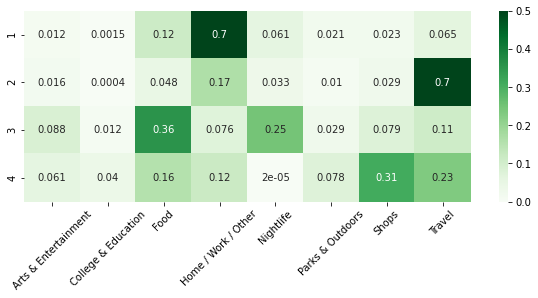

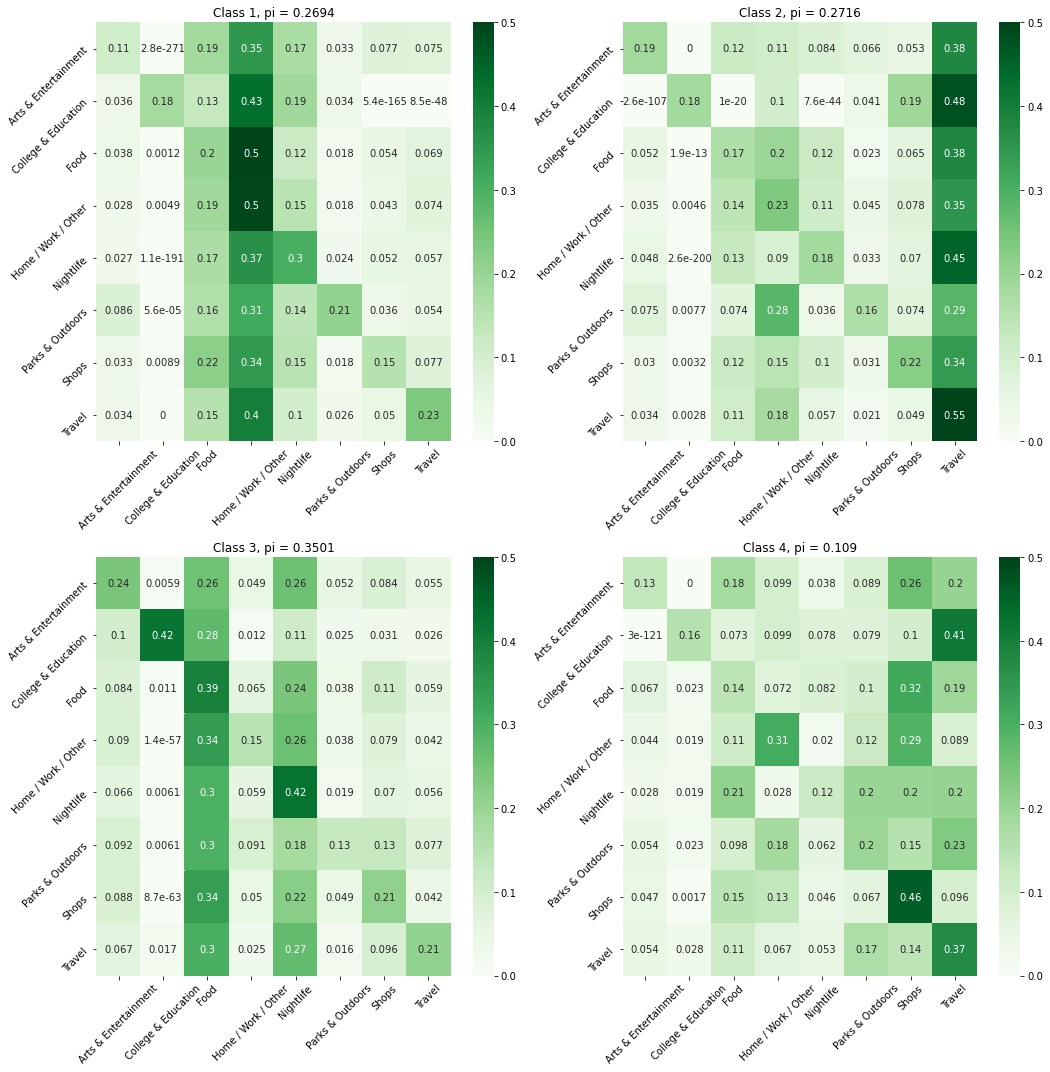

In [22]:
plot_heatmaps(ld.pi, ld.f, ld.T, ld.le, city)

In [9]:
eps=0.001
# min_seq_len=5
q=0.5

results = []
for min_seq_len in range(3,11):
    ld.reset_params()
    seqs, seqs_full, params, predictions_for_city = ld.main(eps=eps, min_seq_len=min_seq_len, q=q, full=False, save=True)
    results.append(params)

Fri Feb  5 01:42:30 2021
London
Fri Feb  5 01:42:52 2021
London generation of sequences - Done
Total count of sequences for min_len = 3: 5467
Quantile 0.5 (count of seqs of unique persons): 5.0
i = 5, L = 0.26293461004298535
i = 10, L = 0.11010481806460912
i = 15, L = 0.113678855826016
i = 20, L = 0.094084669349225
i = 25, L = 0.08717384039501325
i = 30, L = 0.10142005967057888
i = 35, L = 0.05300382459715024
i = 40, L = 0.045842854299040905
i = 45, L = 0.045508025587050735
i = 50, L = 0.05203907289046903
i = 55, L = 0.02576402169217431
i = 60, L = 0.02442171437770785
i = 65, L = 0.009284479073270036
i = 70, L = 0.004964786640110139
i = 75, L = 0.03737431414566164
i = 80, L = 0.027892235422053883
i = 85, L = 0.005443183422346764
i = 90, L = 0.004021959520886457
i = 95, L = 0.00527788295683192
i = 100, L = 0.0032939206332497223
i = 105, L = 0.0027170322770684726
i = 110, L = 0.002718711772323037
i = 115, L = 0.004222089629320582
i = 120, L = 0.005031228510120876
i = 125, L = 0.001617569

KeyboardInterrupt: 

min_seq_len = 3, q=0.5
pi =  [0.1715 0.4007 0.2598 0.1679]


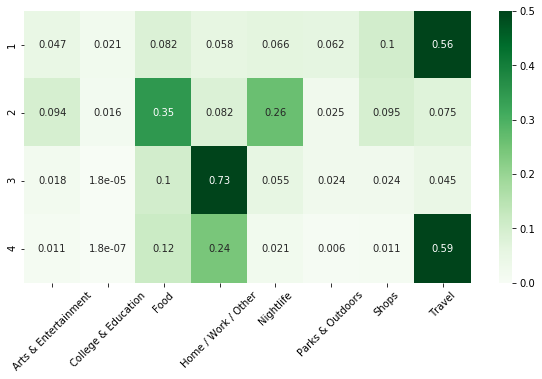

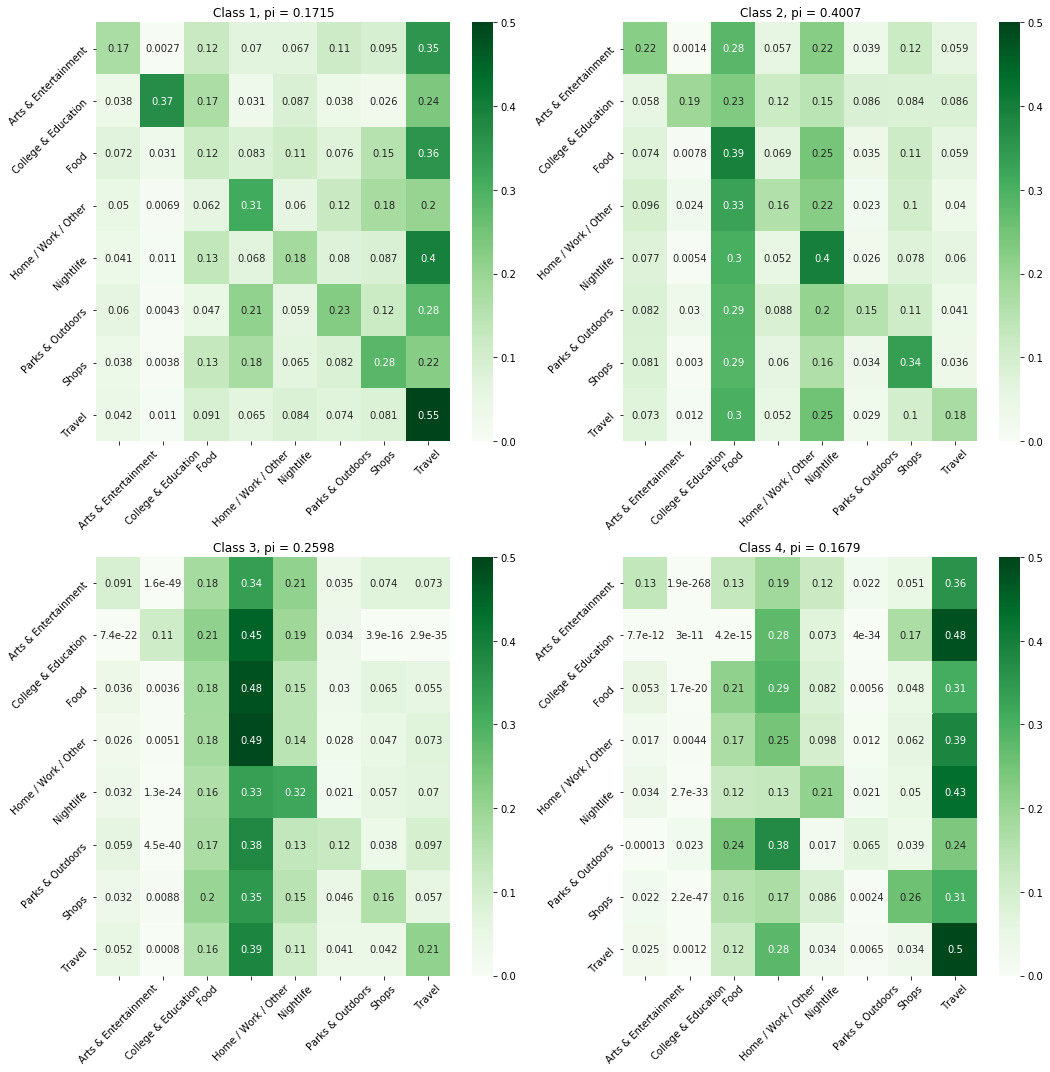







min_seq_len = 4, q=0.5
pi =  [0.2669 0.2123 0.1506 0.3702]


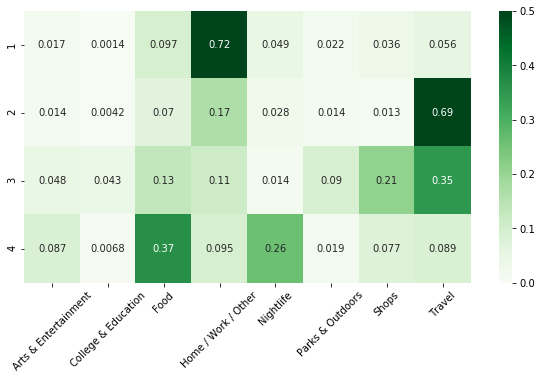

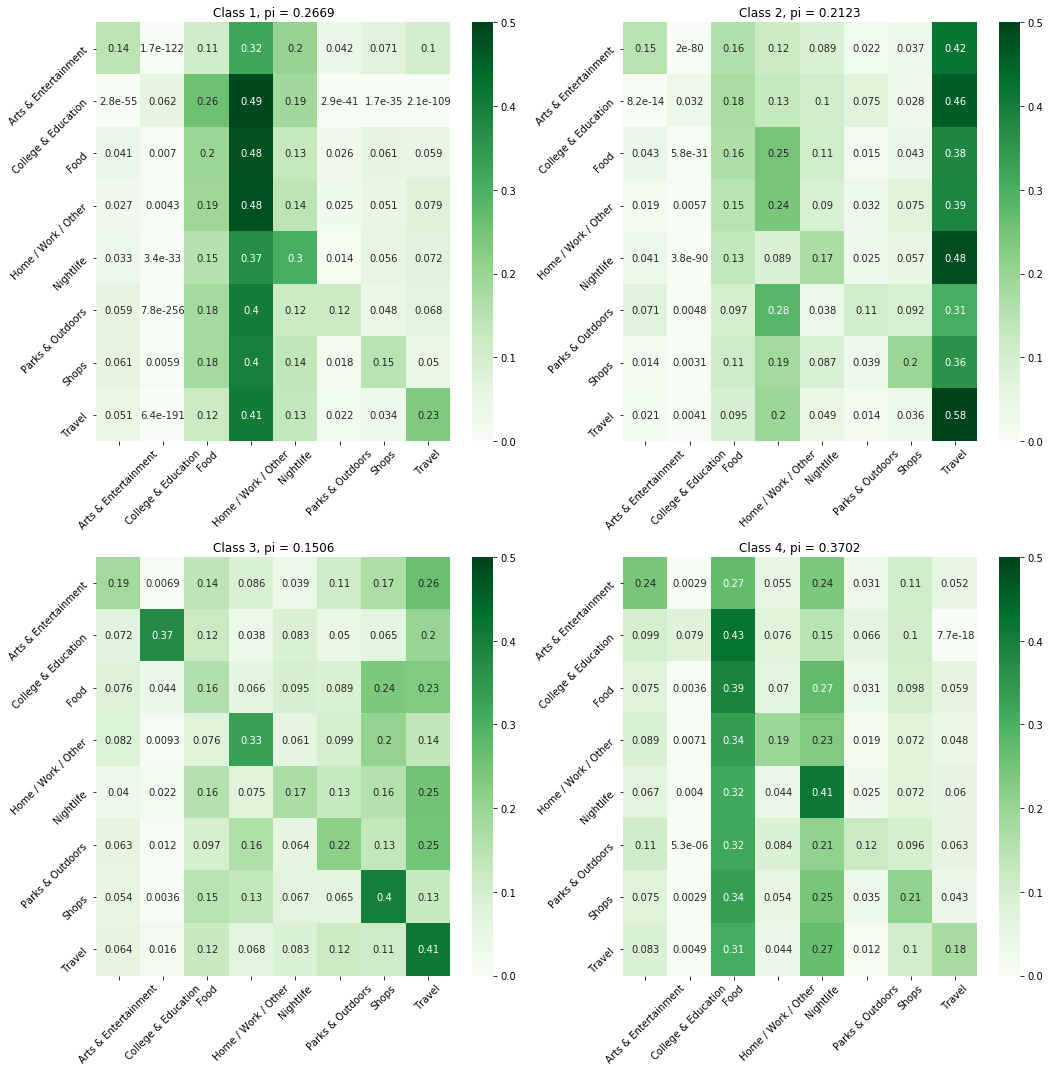







min_seq_len = 5, q=0.5
pi =  [0.2121 0.3439 0.2829 0.161 ]


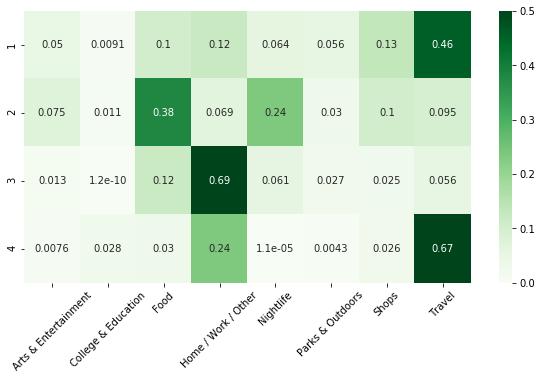

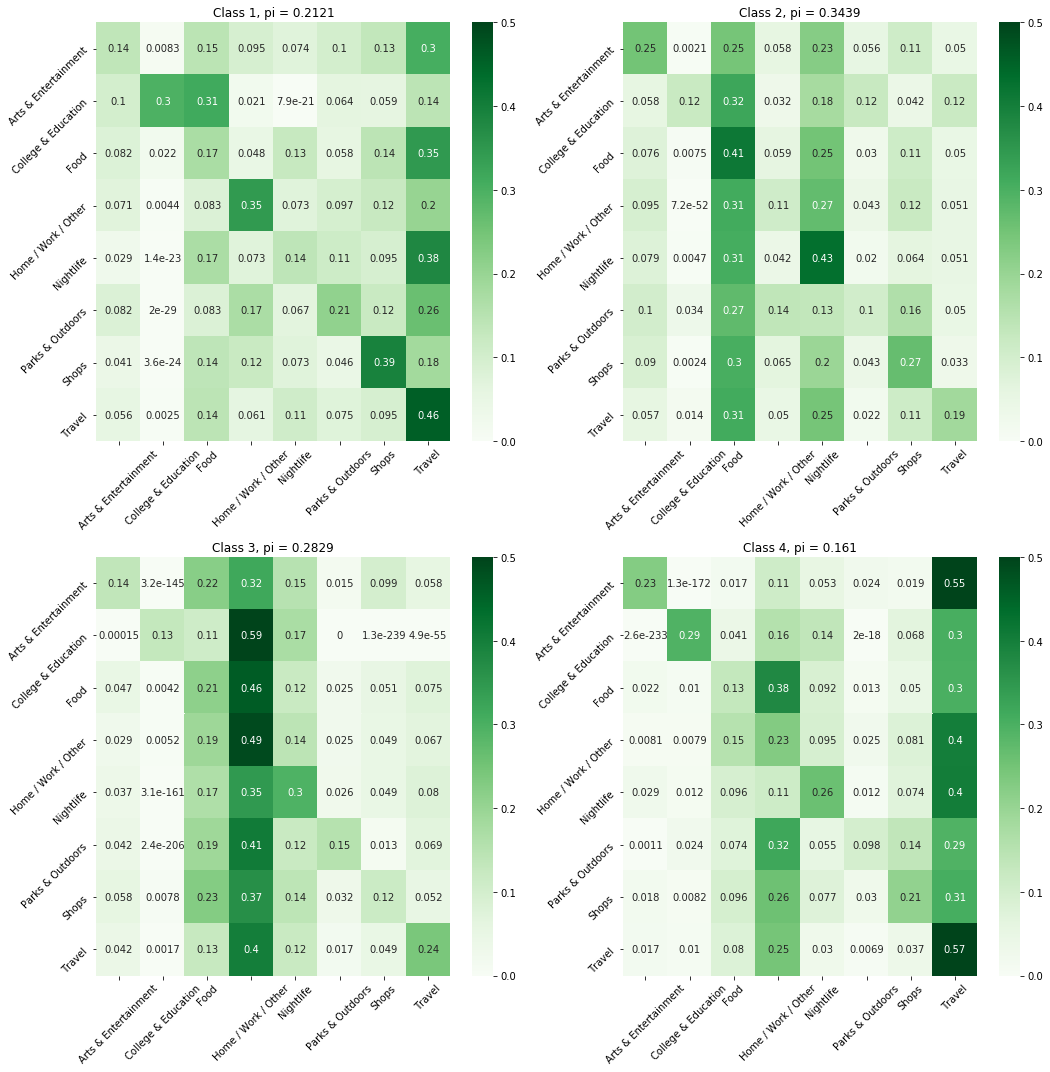







min_seq_len = 6, q=0.5
pi =  [0.3346 0.243  0.2881 0.1343]


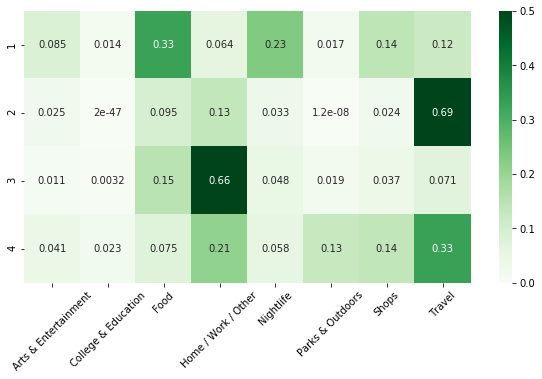

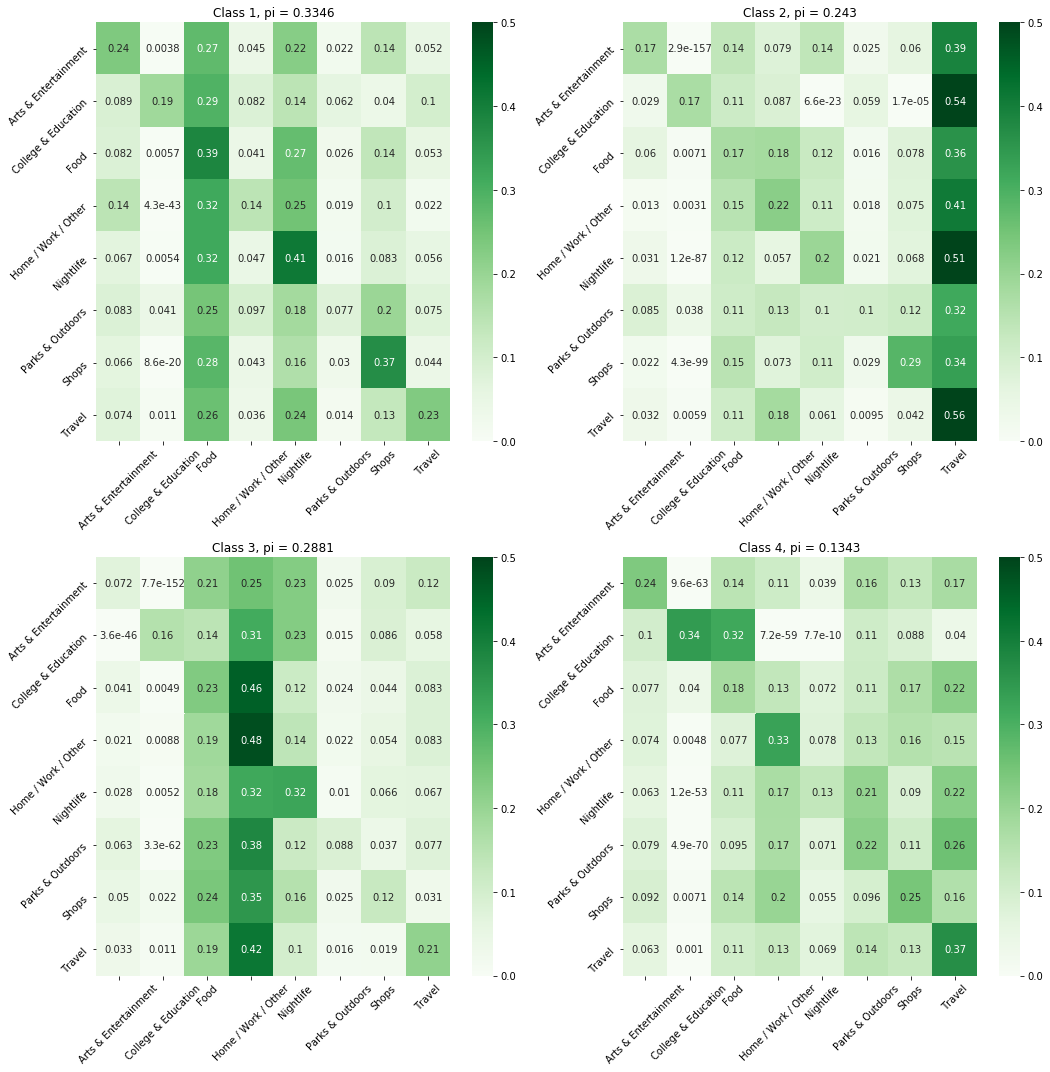







min_seq_len = 7, q=0.5
pi =  [0.3264 0.2244 0.17   0.2792]


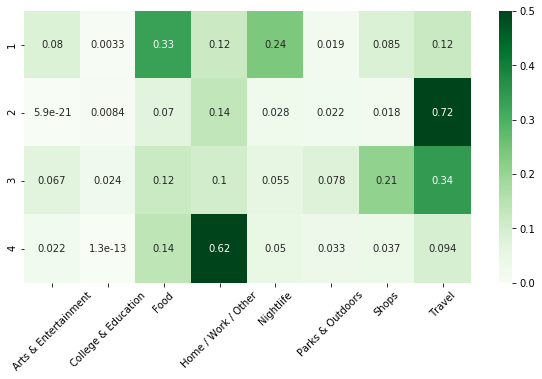

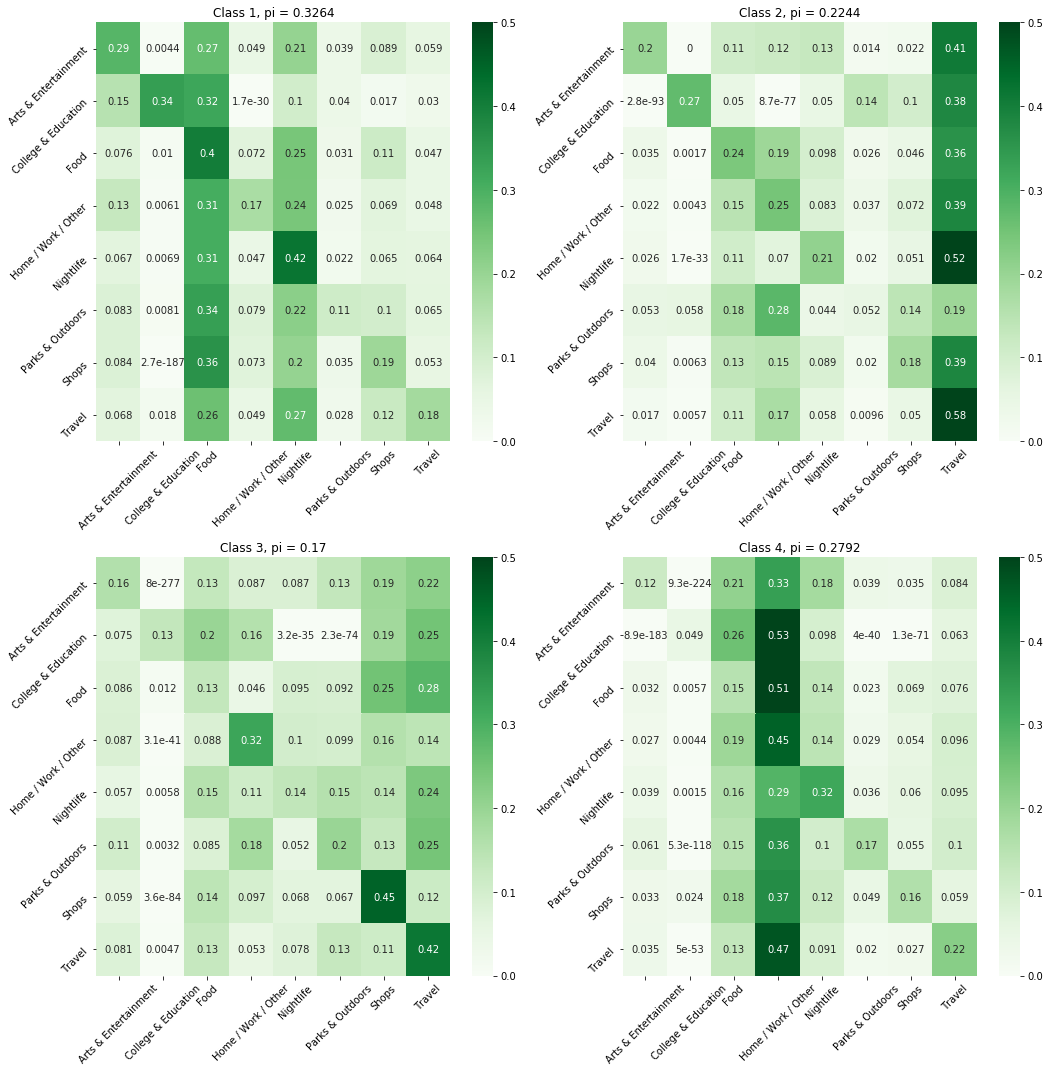







min_seq_len = 8, q=0.5
pi =  [0.2003 0.3065 0.2185 0.2748]


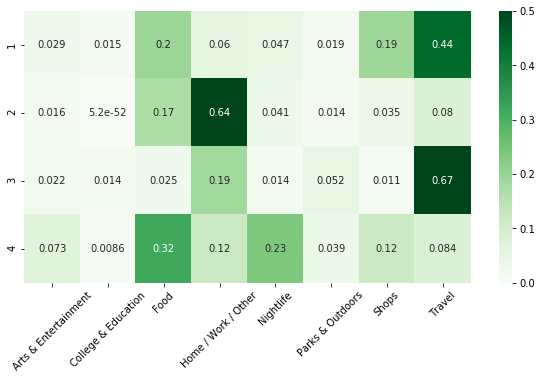

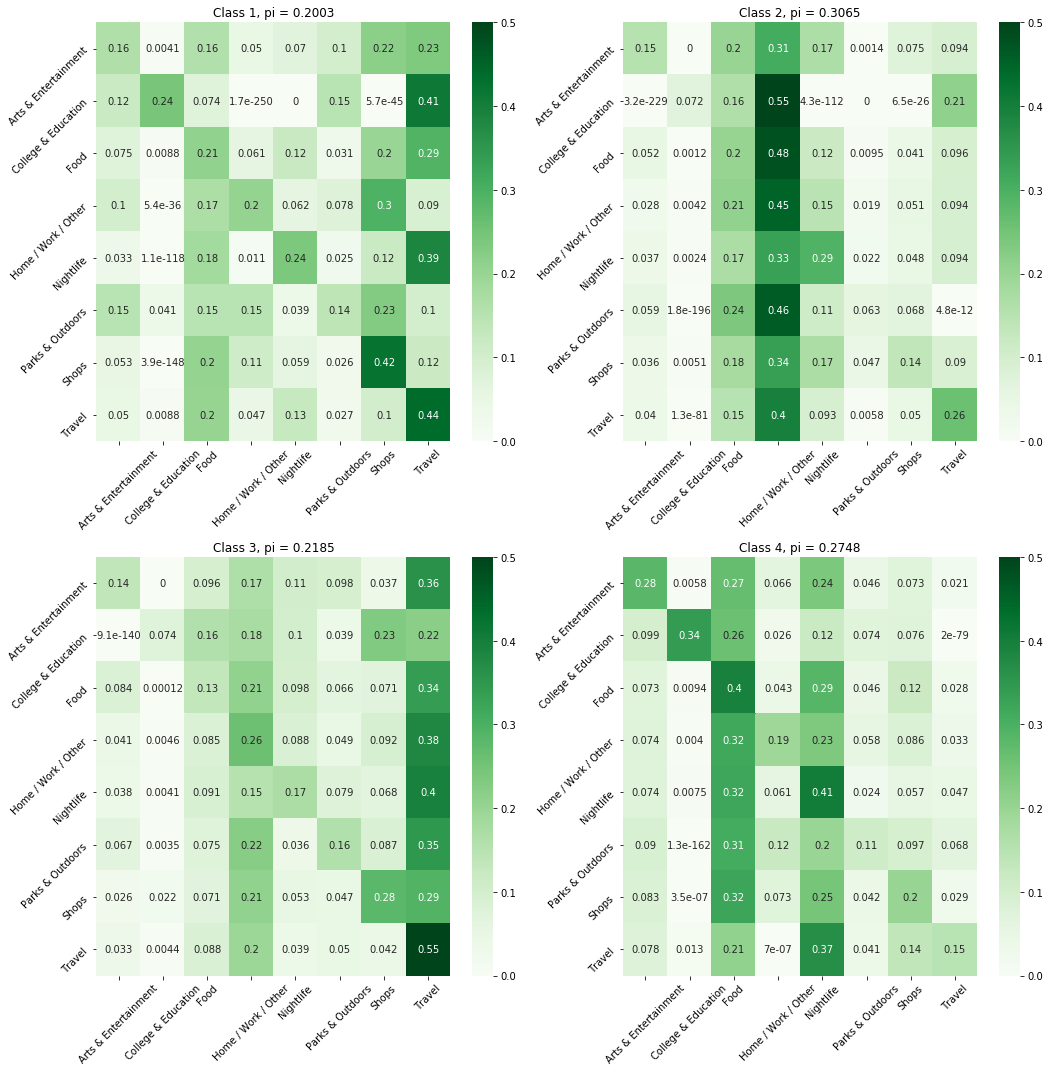







min_seq_len = 9, q=0.5
pi =  [0.2746 0.301  0.1893 0.2351]


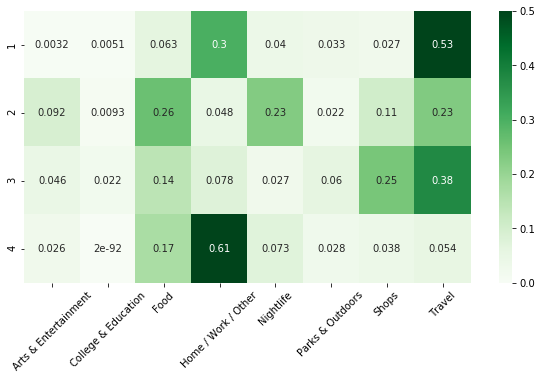

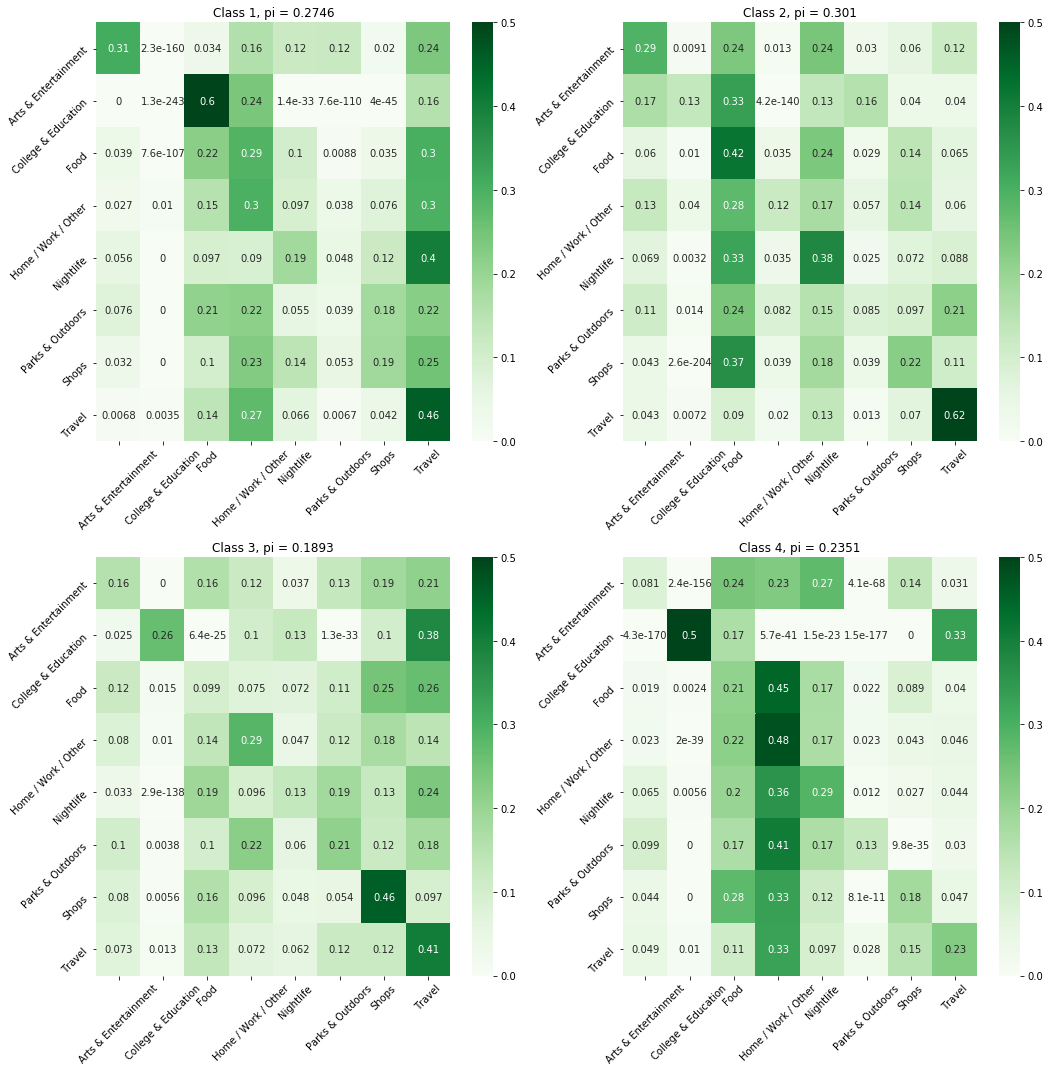







min_seq_len = 10, q=0.5
pi =  [0.2387 0.2245 0.2737 0.2631]


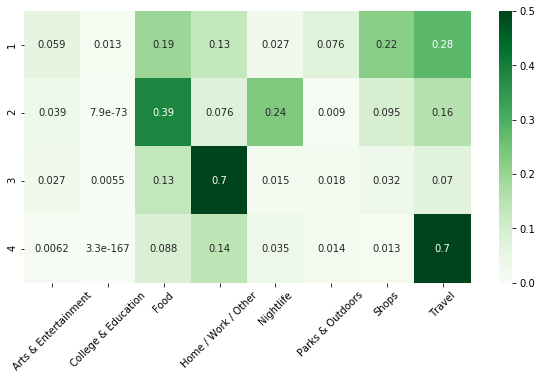

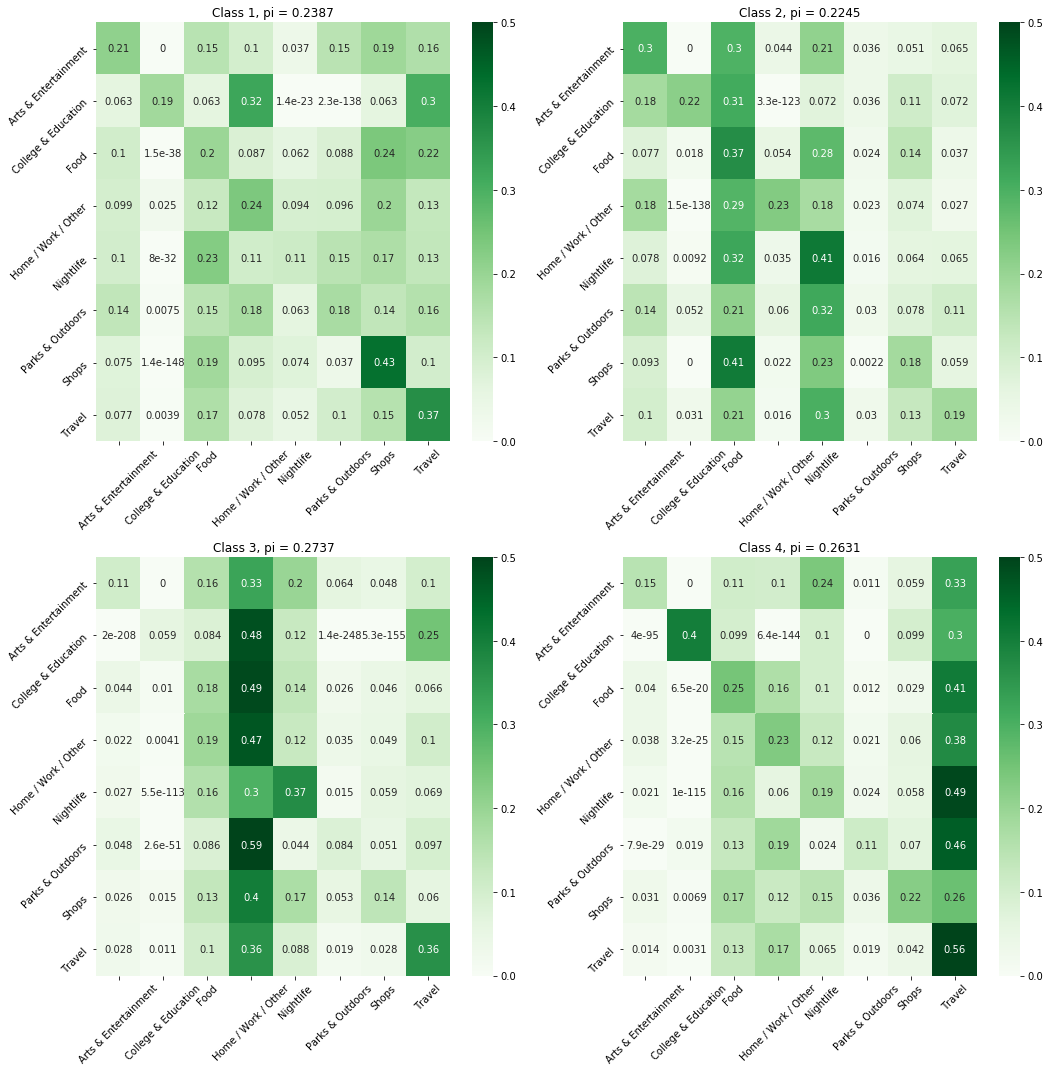

In [11]:
for i in range(len(results)):
    print(f"min_seq_len = {3+i}, q=0.5")
    plot_heatmaps(*results[i], ld.le)
    print('\n'*5)

min_seq_len = 3, q=0.5
pi =  [0.376  0.2336 0.0926 0.2978]


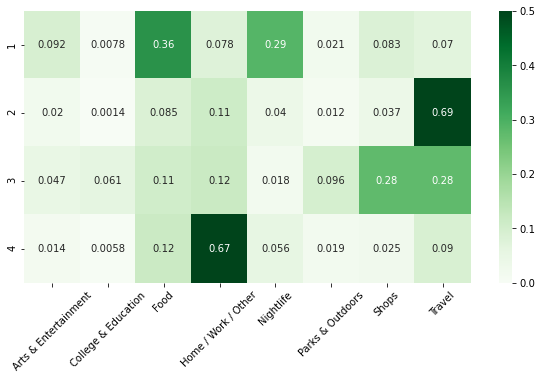

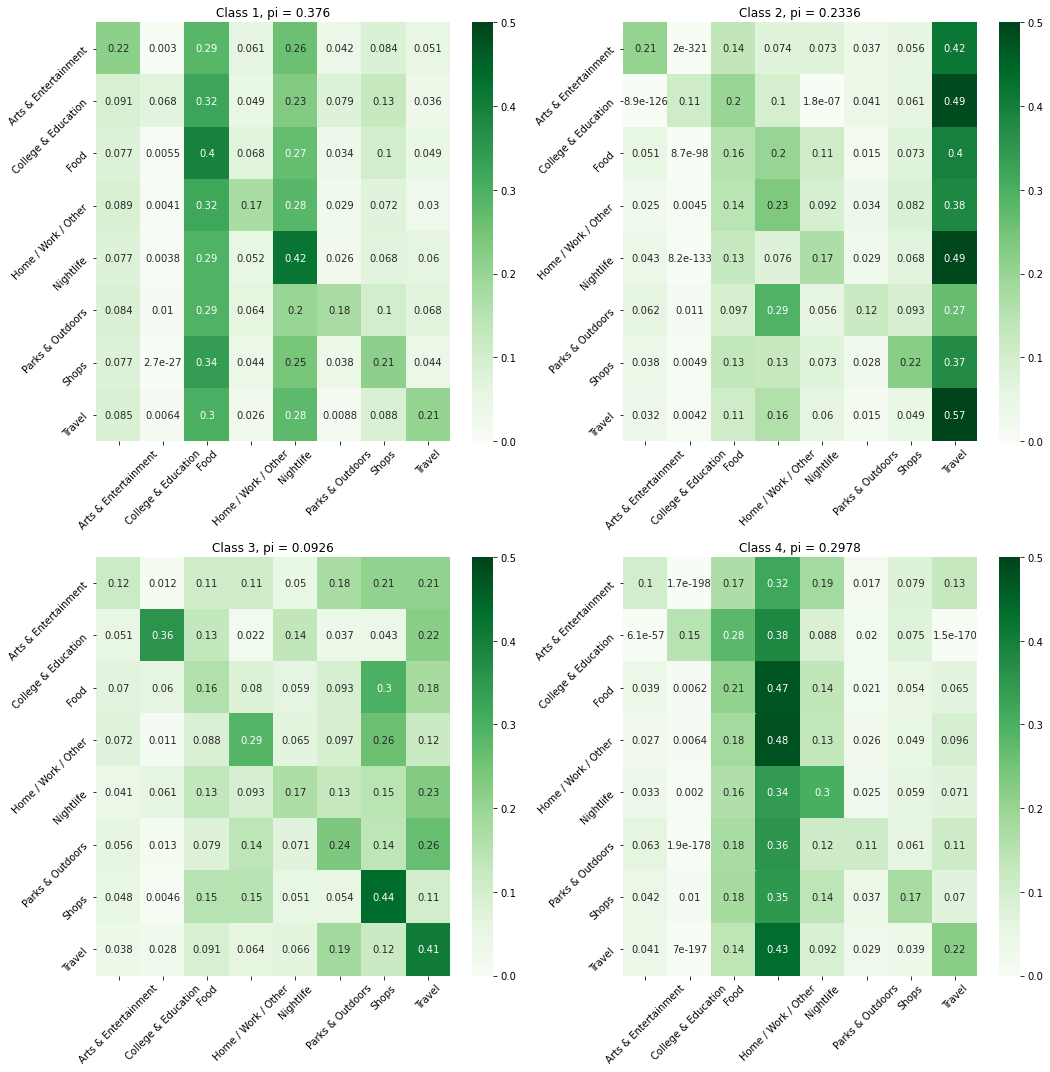







min_seq_len = 4, q=0.5
pi =  [0.3741 0.2675 0.1902 0.1682]


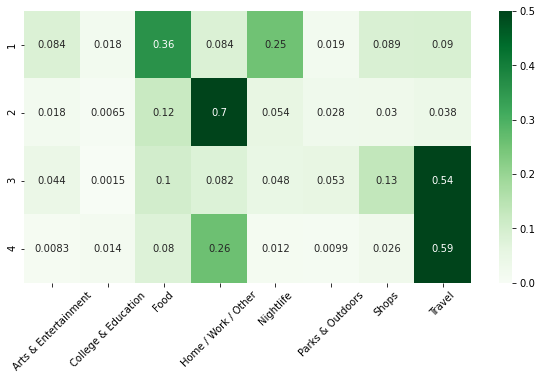

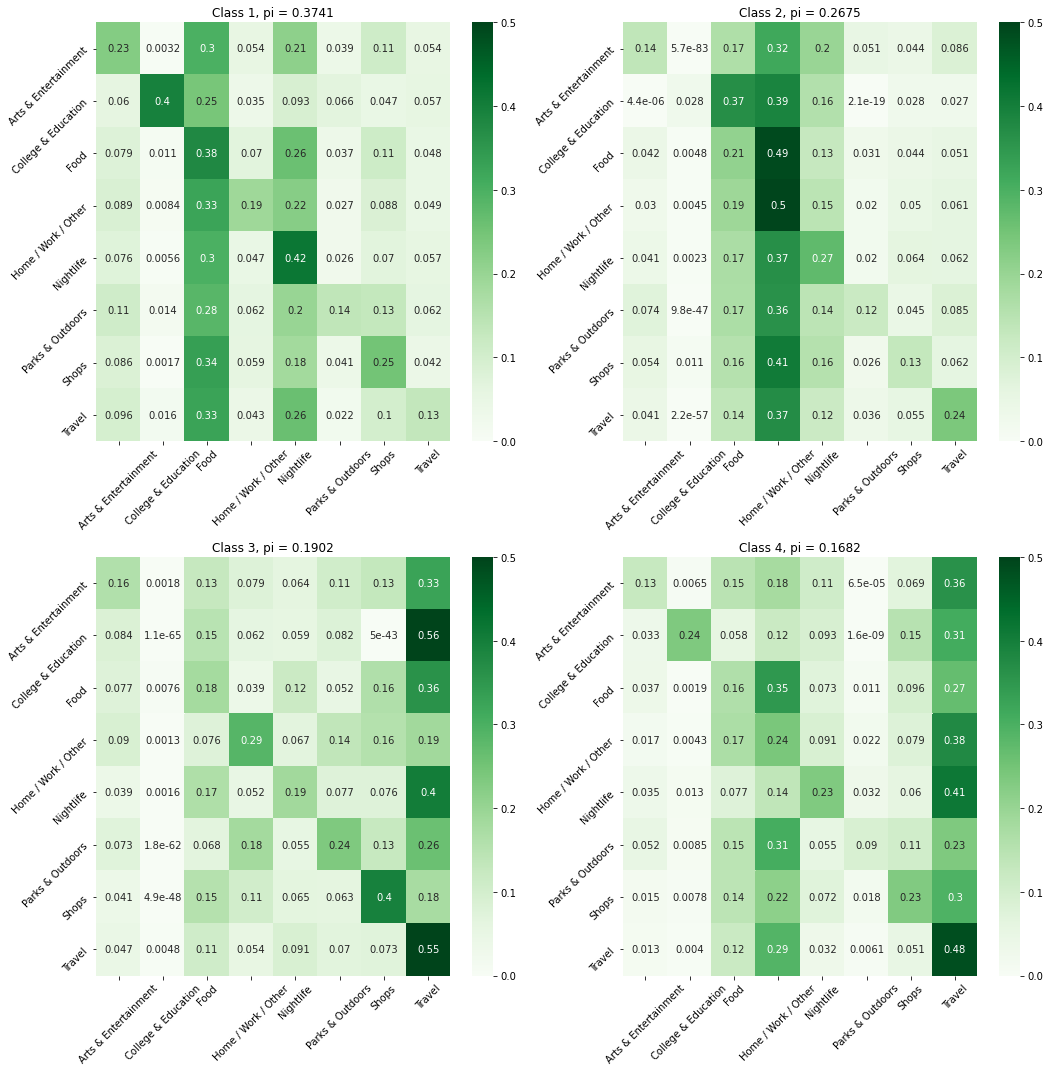

In [10]:
for i in range(len(results)):
    print(f"min_seq_len = {3+i}, q=0.5")
    plot_heatmaps(*results[i], ld.le)
    print('\n'*5)

### the most important categories


In [17]:
def sumofcolumnsT(T, classes):
    arr = []
    for i in range(len(T)):
        arr.append(T[i].sum(axis=0))
    return pd.DataFrame(columns=classes, index=range(1,len(T)+1), data=arr).T.round(3)

def most_frequent_categories(df):
    return [df[col].sort_values(ascending = False)[:3] for col in df]

def print_most_important_categories(a):
    print("\n\n".join([str(i) for i in most_frequent_categories(a)]))

In [7]:
a = sumofcolumnsT(ld.T, ld.le.classes_)

In [8]:
a

,1,2,3,4
Arts & Entertainment,0.389,0.459,0.831,0.428
College & Education,0.197,0.203,0.467,0.271
Food,1.405,0.855,2.503,1.075
Home / Work / Other,3.202,1.340,0.500,0.989
Nightlife,1.320,0.690,1.962,0.495
Parks & Outdoors,0.382,0.424,0.363,1.016
Shops,0.466,0.801,0.807,1.929
Travel,0.639,3.228,0.566,1.798


In [9]:
(a/a.sum()).round(3)

,1,2,3,4
Arts & Entertainment,0.049,0.057,0.104,0.053
College & Education,0.025,0.025,0.058,0.034
Food,0.176,0.107,0.313,0.134
Home / Work / Other,0.400,0.168,0.063,0.124
Nightlife,0.165,0.086,0.245,0.062
Parks & Outdoors,0.048,0.053,0.045,0.127
Shops,0.058,0.100,0.101,0.241
Travel,0.080,0.404,0.071,0.225


In [18]:
print_most_important_categories(a)

Home / Work / Other    3.202
Food                   1.405
Nightlife              1.320
Name: 1, dtype: float64

Travel                 3.228
Home / Work / Other    1.340
Food                   0.855
Name: 2, dtype: float64

Food                    2.503
Nightlife               1.962
Arts & Entertainment    0.831
Name: 3, dtype: float64

Shops     1.929
Travel    1.798
Food      1.075
Name: 4, dtype: float64


In [20]:
print_most_important_categories((a/a.sum()).round(3))

Home / Work / Other    0.400
Food                   0.176
Nightlife              0.165
Name: 1, dtype: float64

Travel                 0.404
Home / Work / Other    0.168
Food                   0.107
Name: 2, dtype: float64

Food                    0.313
Nightlife               0.245
Arts & Entertainment    0.104
Name: 3, dtype: float64

Shops     0.241
Travel    0.225
Food      0.134
Name: 4, dtype: float64
